# Day_015

### 練習時間
1. 用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline # 內嵌繪圖，並且可以省略掉 plt.show()
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')

In [3]:
# 1. 用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
np.random.seed(5)
matrix = pd.DataFrame(np.random.uniform(-1, 1, size=(10,10)))

# 取得各組亂數之間的相關性
matrix_corrs = matrix.corr()
matrix_corrs

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.310879,0.044318,-0.079245,-0.221281,-0.373003,0.228191,0.137716,-0.002843,-0.568769
1,-0.310879,1.000000,0.049825,0.328638,0.247502,-0.059243,0.275481,-0.356802,-0.074570,0.036291
2,0.044318,0.049825,1.000000,0.508151,-0.108663,0.014060,-0.252927,-0.241164,-0.191561,0.149677
3,-0.079245,0.328638,0.508151,1.000000,-0.096263,0.468909,0.073085,-0.531920,-0.334929,0.086457
4,-0.221281,0.247502,-0.108663,-0.096263,1.000000,-0.394796,-0.105823,-0.524596,-0.267264,0.242799
5,-0.373003,-0.059243,0.014060,0.468909,-0.394796,1.000000,0.199390,-0.014273,-0.451422,-0.031496
6,0.228191,0.275481,-0.252927,0.073085,-0.105823,0.199390,1.000000,-0.201765,-0.065162,-0.205108
7,0.137716,-0.356802,-0.241164,-0.531920,-0.524596,-0.014273,-0.201765,1.000000,0.169772,-0.497825
8,-0.002843,-0.074570,-0.191561,-0.334929,-0.267264,-0.451422,-0.065162,0.169772,1.000000,0.191602
9,-0.568769,0.036291,0.149677,0.086457,0.242799,-0.031496,-0.205108,-0.497825,0.191602,1.000000


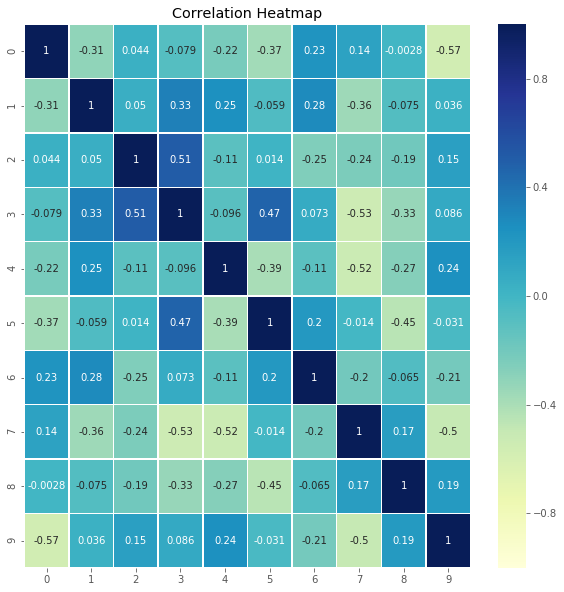

In [4]:
plt.figure(figsize=(10,10))

# Heatmap of correlations，cmap:矩陣顏色 / annot:加上數值 / vmin,vmax:區間數值 / linewidths:線條間距
heatmap = sns.heatmap(matrix_corrs, cmap = 'YlGnBu', vmin = -1.0, annot = True, vmax = 1.0, linewidths = 0.5) 
plt.title('Correlation Heatmap')

plt.show()

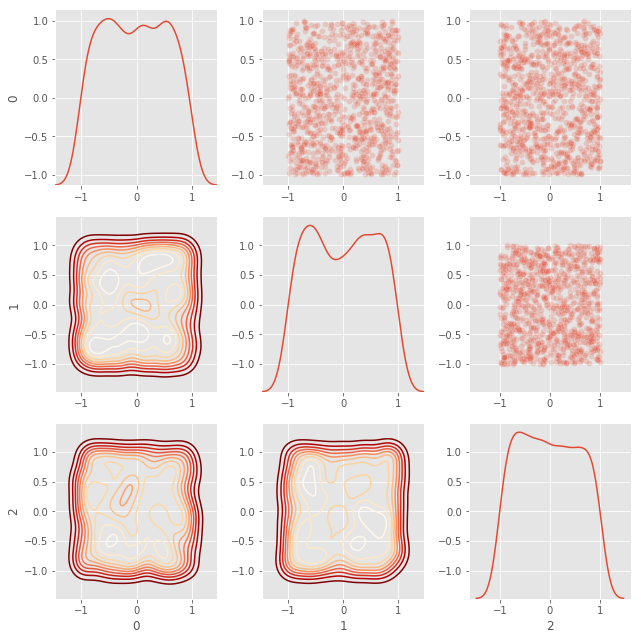

In [5]:
# 2. 用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
nrow = 1000
ncol = 3

np.random.seed(10)
matrix = np.random.uniform(-1, 1, size = (1000,3))

indice = np.random.choice([0,1,2], size = nrow) # 從 0,1,2 三個數中，隨機選擇 1000 個出來
plot_data = pd.DataFrame(matrix, indice)

grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey = False)

grid.map_upper(plt.scatter, alpha = 0.2, edgecolor = 'w')
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()

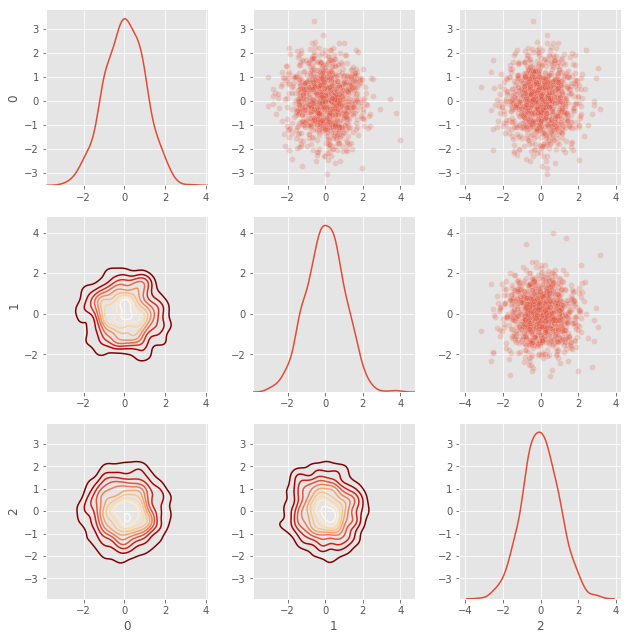

In [6]:
# 3. 用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
nrow = 1000
ncol = 3

np.random.seed(1)
# 常態分布平均值(loc)，標準差(scale)
matrix = np.random.randn(nrow * ncol).reshape((nrow, ncol))

indice = np.random.choice([0,1,2], size = nrow)
plot_data = pd.DataFrame(matrix, indice)


grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False)

grid.map_upper(plt.scatter, alpha = 0.2, edgecolor = 'w')
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()